## Fundamentals 3

In [113]:
import pandas as pd
%sql sqlite:///week2.db

'Connected: None@week2.db'

## Today

- Last week of `SQL` and `Python` fundamentals
- `JOIN`
- Setting the stage for data analysis in Python

This course is challenging, but the type of challenge changes after this week.

Up to now, the challenge is in context-shifting, and understanding the differences between many different concepts. Starting next week, the challenge will be more about application and problem-solving. Fewer disparate concepts, but trickier to grasp.

#### Structure note

## Review

### Mapping this course's concepts

**Databases**
 - Relational databases
 - NoSQL databases
 - The systems are known as DBMSs - Database Management Systems
 
**DBMSs**
 - The one we use is 'SQLite': which is super lightweight, stored as a single file on your filesystem, with dynamic typing

### Mapping this course's concepts

**SQL**: a language for accessing databases: how do you ask for stuff from the system?
- not quite a programming language: it's heavily structured to its task of 'asking for stuff'
- SQL can exists in many forms: on the command line, in an application. It is _not_ inherently related to or dependent on Python, though Python is one possible way to use it.

**Python**: a programming language. Allows you to do many things, but we'll be focusing on database and data science uses.

Why are we learning Python? After this week, we'll be relying on tools in Python to work with structured data.

## SQL Review

`CREATE TABLE table_name (column1, column2);`

`INSERT INTO table_name VALUES (field1, field2);`

`SELECT column1, column2 FROM table_name;`

In [16]:
%load_ext sql
%sql sqlite:///../data/circulation.sqlite

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: None@../data/circulation.sqlite'

### `WHERE` clause

In [18]:
%%sql
SELECT * FROM patrons
    WHERE age == 61;

Done.


id,name,age,email,zipcode,city,activity
236,Jonathan Daniels,61,qgutierrez@jimenez.com,34547,Port Stephanie,2
449,Molly Acosta,61,tinagrant@hotmail.com,62921,East Pamelaburgh,3
484,Wesley Price,61,munozkevin@gmail.com,48788,Loganchester,7
492,Karla Alexander,61,desiree22@brown-williams.com,45479,Lake Marissa,4
727,Luis Ho,61,jstanley@schaefer.com,75009,Michelefurt,0


### `AND`

In [24]:
%%sql
SELECT * FROM patrons
    WHERE age > 60 AND activity > 6;

Done.


id,name,age,email,zipcode,city,activity
266,Richard Jackson,64,elliottstephanie@yahoo.com,94105,Loganchester,8
484,Wesley Price,61,munozkevin@gmail.com,48788,Loganchester,7
516,Latoya Clark,82,lanceosborne@hotmail.com,79851,Deborahbury,9
519,Brian Rubio,65,mchambers@rice.com,80314,Thomasmouth,7
526,Dawn Jones,66,thaynes@yahoo.com,66603,Rothton,8
572,Matthew Walsh,73,stanley25@rivera-wood.com,27152,Loganchester,7
828,Kathryn Nguyen,62,wongandrea@clark.net,18945,Lake Marissa,9
856,Carrie Ramirez,68,llam@simpson.com,36689,Loganchester,8
911,Jackie Arias,80,sandra83@ramirez-wheeler.com,53858,Michelefurt,9


### Lab 2 Review

In [9]:
%%sql sqlite:///
CREATE TABLE worker_wages (role, num_workers, wage);
INSERT INTO worker_wages VALUES
    ('Big piecer', 5902, 233.59),
    ('Engineman', 909, 388.47),
    ('Foreman', 2883, 466.54),
    ('Grinders', 1983, 399.9),
    ('Labourer', 208, 269.73),
    ('Mechanic', 669, 440.82),
    ('Others', 2966, 311.64),
    ('Sizer', 597, 469.62),
    ('Spinner', 6951, 408.97),
    ('Twister', 865, 357.2);

Done.
10 rows affected.


[]

**Q**: Write the SQL to add these two rows to the `worker_wages` table:
        
| worker | num_workers |	wage |
|------------------------------|
|Drawer |	375|	328.98|
|Warehouseman|	1586|	308.73|

In [10]:
%%sql
INSERT INTO worker_wages VALUES ("Drawer", 375, 328.98 )

Done.


role,num_workers,wage
Big piecer,5902,233.59
Engineman,909,388.47
Foreman,2883,466.54
Grinders,1983,399.9
Labourer,208,269.73
Mechanic,669,440.82
Others,2966,311.64
Sizer,597,469.62
Spinner,6951,408.97
Twister,865,357.2


**Q**: What's wrong with this SQL?
    
```sql
    INSERT INTO worker_wages VALUES (Weaver, 8577, 273.97);
```

In [19]:
%%sql sqlite:///../data/week2.db
SELECT * from heights
    WHERE height > 185;

Done.


Unnamed: 0,sex,weight,height,repwt,repht
8,M,69,186,73.0,180.0
17,M,92,187,101.0,185.0
19,M,76,197,75.0,200.0
40,M,65,187,67.0,188.0
65,M,97,189,98.0,185.0
95,M,88,189,87.0,185.0
139,M,90,188,91.0,185.0
140,M,85,191,83.0,188.0
169,M,96,191,95.0,188.0


What's wrong with this?

In [22]:
%%sql
SELECT * from heights
    WHERE sex == 'm';

Done.


Unnamed: 0,sex,weight,height,repwt,repht


*Q*: How would you select the women that overestimate their weight and underestimate their height?

In [27]:
%%sql
SELECT * FROM heights
    WHERE sex == 'F'
    AND repwt > weight
    AND repht < height
;

Done.


Unnamed: 0,sex,weight,height,repwt,repht
3,F,53,161,54.0,158.0
13,F,51,161,52.0,158.0
15,F,52,163,57.0,160.0
16,F,65,166,66.0,165.0
25,F,54,171,59.0,168.0
28,F,58,166,60.0,160.0
29,F,39,157,41.0,153.0
46,F,54,160,55.0,158.0
49,F,54,174,56.0,173.0
52,F,56,165,57.0,163.0


## Python Review

In [45]:
from IPython.display import YouTubeVideo

### Loops

A `for` loop repeats a set of instructions.

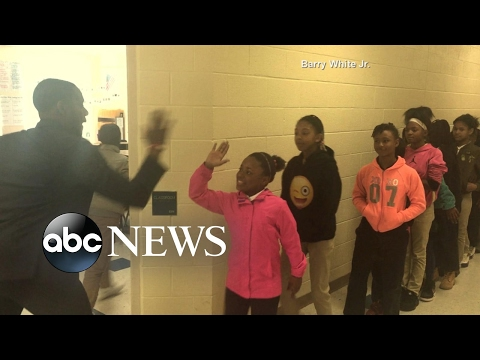

In [46]:
YouTubeVideo('I0jgcyfC2r8')

```python
for something in a_bunch_of_somethings:
    do_something()
    do_something_else()
```

*"For every student in the class, perform handshake"*

```python
for student in classroom:
    handshake()
```

`for` loops *iterate* through a collection of objects, setting each object to a variable and running through the loop in turn.

'collection of objects' - vague and general, because there's a lot you can iterate through.

*"For every student in the class, perform **a student-specific** handshake"*

```python
for student in classroom:
    handshake(student)
```

Where `handshake(name)` is an imaginary function that can bring up a student's handshake instructions.

In [30]:
balance = 1000

for expense in [6, 5, 4, 3, -1000]:
    print("SPENDING:")
    print(expense)
    balance = balance + expense
    print("REMAINING:")
    print(balance)
    print('----')
    
print("Final balance:", balance)

SPENDING:
6
REMAINING:
1006
----
SPENDING:
5
REMAINING:
1011
----
SPENDING:
4
REMAINING:
1015
----
SPENDING:
3
REMAINING:
1018
----
SPENDING:
-1000
REMAINING:
18
----
Final balance: 18


In [58]:
balance = 1000

for expense in [6, 5, 4, 3, -1000]:
    if expense > 0: 
        print("Spending $", expense)
    else:
        print("Payday!")

    balance = balance + expense
    print("Remaining balanced on credit card: $", balance)

Spending $ 6
Remaining balanced on credit card: $ 1006
Spending $ 5
Remaining balanced on credit card: $ 1011
Spending $ 4
Remaining balanced on credit card: $ 1015
Spending $ 3
Remaining balanced on credit card: $ 1018
Payday!
Remaining balanced on credit card: $ 18


In [14]:
%sql sqlite:///../data/week2.db
results = %sql SELECT * FROM heights;

Done.


In [31]:
results

Unnamed: 0,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
6,M,76,170,76.0,165.0
7,M,76,167,77.0,165.0
8,M,69,186,73.0,180.0
9,M,71,178,71.0,175.0
10,M,65,171,64.0,170.0


In [73]:
for record in results:
    print(record)

(1, 'M', 77, 182, 77.0, 180.0)
(2, 'F', 58, 161, 51.0, 159.0)
(3, 'F', 53, 161, 54.0, 158.0)
(4, 'M', 68, 177, 70.0, 175.0)
(5, 'F', 59, 157, 59.0, 155.0)
(6, 'M', 76, 170, 76.0, 165.0)
(7, 'M', 76, 167, 77.0, 165.0)
(8, 'M', 69, 186, 73.0, 180.0)
(9, 'M', 71, 178, 71.0, 175.0)
(10, 'M', 65, 171, 64.0, 170.0)
(11, 'M', 70, 175, 75.0, 174.0)
(12, 'F', 166, 57, 56.0, 163.0)
(13, 'F', 51, 161, 52.0, 158.0)
(14, 'F', 64, 168, 64.0, 165.0)
(15, 'F', 52, 163, 57.0, 160.0)
(16, 'F', 65, 166, 66.0, 165.0)
(17, 'M', 92, 187, 101.0, 185.0)
(18, 'F', 62, 168, 62.0, 165.0)
(19, 'M', 76, 197, 75.0, 200.0)
(20, 'F', 61, 175, 61.0, 171.0)
(21, 'M', 119, 180, 124.0, 178.0)
(22, 'F', 61, 170, 61.0, 170.0)
(23, 'M', 65, 175, 66.0, 173.0)
(24, 'M', 66, 173, 70.0, 170.0)
(25, 'F', 54, 171, 59.0, 168.0)
(26, 'F', 50, 166, 50.0, 165.0)
(27, 'F', 63, 169, 61.0, 168.0)
(28, 'F', 58, 166, 60.0, 160.0)
(29, 'F', 39, 157, 41.0, 153.0)
(30, 'M', 101, 183, 100.0, 180.0)
(31, 'F', 71, 166, 71.0, 165.0)
(32, 'M', 75

Knowing we can iterate through the results from the SQL table, how might we look at the average difference between estimate and reality?

In [44]:
# Edit this
for record in results:
    print(record)

-3.05

In [88]:
total_height = 0

for id, sex, weight, height, reported_weight, reported_height in results[:5]:
    diffh = height - reported_height
    diffw = weight - reported_weight
    print("Person", id)
    print("   The difference between their real and reported height is", diffh)
    print("   The difference between their real and reported weight is", diffw)

Person 1
   The difference between their real and reported height is 2.0
   The difference between their real and reported weight is 0.0
Person 2
   The difference between their real and reported height is 2.0
   The difference between their real and reported weight is 7.0
Person 3
   The difference between their real and reported height is 3.0
   The difference between their real and reported weight is -1.0
Person 4
   The difference between their real and reported height is 2.0
   The difference between their real and reported weight is -2.0
Person 5
   The difference between their real and reported height is 2.0
   The difference between their real and reported weight is 0.0


In [84]:
total_height = 0
number_of_people = 0

for id, sex, weight, height, reported_weight, reported_height in results:
    total_height = total_height + height
    number_of_people = number_of_people + 1
    
total_height / number_of_people

170.02

# More SQL Concepts

`LIMIT`, `ORDER BY`, `LIKE`, `OR`, `JOIN`


*To follow along*

Download [circulation.sqlite](https://github.com/organisciak/Scripting-Course/blob/master/data/circulation.sqlite?raw=true) and place in the same folder as this lab. Then connect to it in this way:

```
%load_ext sql
%sql sqlite:///circulation.sqlite
```

In [93]:
# On Dr. O's computer, the file is not in the same folder, 
# but one directory up, in a 'data' folder. That's why ../data/ is added here.
%sql sqlite:///../data/circulation.sqlite

'Connected: None@../data/circulation.sqlite'

## `LIMIT`

LIMIT can limit the number of results that SELECT returns. Add it to the end of a `SELECT` statement.

```sql
SELECT colName
    FROM tableName
    LIMIT count;
```

In [11]:
%%sql sqlite:///../data/circulation.sqlite
SELECT * FROM patrons
    LIMIT 5;

Done.


id,name,age,email,zipcode,city,activity
1,Jeremy Mata,30,timothymoore@gmail.com,52022,Thomasmouth,9
2,Daniel Garcia,55,mcdanielwilliam@sanchez-herrera.biz,09529,Deborahbury,3
3,Warren Green,17,janice81@flores.com,55036,Michelefurt,1
4,Erika Smith,4,tnichols@gregory.com,11235,Port Stephanie,3
5,Matthew Johnson,22,christina30@manning.info,52521,Jamesfort,4


### Quick look at our current database

In [12]:
%%sql
SELECT * FROM patrons
    LIMIT 2;

Done.


id,name,age,email,zipcode,city,activity
1,Jeremy Mata,30,timothymoore@gmail.com,52022,Thomasmouth,9
2,Daniel Garcia,55,mcdanielwilliam@sanchez-herrera.biz,09529,Deborahbury,3


In [107]:
%%sql
SELECT * FROM books
    LIMIT 2;

Done.


id,title,author,isbn
1,Sun Tzu: Art Of War,Sun Tzu,0-433-19939-3
2,The Way and Its Power: A Study of the Tao T? Ching and Its Place in Chinese Thought,Arth Estate the,0-213-70445-5


In [106]:
%%sql
SELECT * FROM circulation
    LIMIT 2;

Done.


book_id,patron_id,checkout_time,return_time
1898,862,2017-05-11 16:53:33.000000,2017-06-09 16:40:11.804214
450,215,2018-01-05 13:07:20.000000,2018-01-23 10:00:01.071255


## Paging

`LIMIT offset, count`

In [101]:
%%sql
SELECT * FROM patrons
    LIMIT 3, 5;

Done.


id,name,age,email,zipcode,city,activity
4,Erika Smith,4,tnichols@gregory.com,11235,Port Stephanie,3
5,Matthew Johnson,22,christina30@manning.info,52521,Jamesfort,4
6,Jackson Jackson,6,vincent18@compton-figueroa.com,83620,Irwinside,5
7,Sarah Brown,19,tyler16@mendoza.biz,98407,Kevinmouth,4
8,Michael Barnett,46,keith30@andersen.com,56064,Marystad,7


## `ORDER BY`

 > `ORDER BY columnName DESC|ASC`

`ORDER BY` allows you to specify a column to sort by, and whether it is sorted in ascending order (`ASC`) or descending order (`DESC`).

In [48]:
%%sql sqlite:///../data/circulation.sqlite
SELECT * FROM patrons
    ORDER BY age DESC
    LIMIT 5;

Done.


id,name,age,email,zipcode,city,activity
516,Latoya Clark,82,lanceosborne@hotmail.com,79851,Deborahbury,9
911,Jackie Arias,80,sandra83@ramirez-wheeler.com,53858,Michelefurt,9
89,Jennifer Bradley,79,jacquelinenoble@williams-ayala.com,63196,Port Stephanie,4
385,Shannon Smith,79,christinamullen@yahoo.com,24061,Walkerview,0
238,Christopher James,78,cookchristopher@yahoo.com,71849,Cooperton,4


In [50]:
%%sql
SELECT * FROM patrons
    ORDER BY name ASC
    LIMIT 5;

Done.


id,name,age,email,zipcode,city,activity
149,Aaron Lindsey,23,nancyzuniga@reed.com,34642,Colechester,8
25,Aaron Sampson,29,mark96@matthews.com,05855,East Brookefort,2
548,Aaron Savage,30,phillipsjason@haynes.com,96235,Jamesfort,7
654,Aaron Shah,24,khill@yahoo.com,10017,Normanville,1
416,Abigail Vazquez,40,becky04@alexander-ellis.com,98164,Lake Marissa,0


Review: when using a `WHERE` clause, how do we ask for multiple conditions?

_e.g. Select patrons that are 23 and have a library activity level of 7:_

In [51]:
%%sql
SELECT * FROM patrons
    WHERE ...

Done.


id,name,age,email,zipcode,city,activity
23,Brittany Coleman,23,watsonscott@gmail.com,34912,North Stephenfort,7
517,Christina Bush,23,moranjennifer@hotmail.com,94699,South Danielport,7


In [114]:
%%sql
SELECT * FROM patrons
    WHERE age == 23 AND activity == 7;

Done.


id,name,age,email,zipcode,city,activity
23,Brittany Coleman,23,watsonscott@gmail.com,34912,North Stephenfort,7
517,Christina Bush,23,moranjennifer@hotmail.com,94699,South Danielport,7


What about people that are just one of those conditions: either 23 years old or have an activity level of 7?

## `OR`

In [ ]:
%%sql
SELECT * FROM patrons
    WHERE age == 23 OR activity == 7;

In [54]:
%%sql
SELECT * FROM patrons
    WHERE (age == 23) OR (activity == 7);

Done.


id,name,age,email,zipcode,city,activity
8,Michael Barnett,46,keith30@andersen.com,56064,Marystad,7
18,Vanessa Owen,12,hbailey@foley.com,39489,East Brookefort,7
23,Brittany Coleman,23,watsonscott@gmail.com,34912,North Stephenfort,7
24,Justin Butler,21,justinmejia@hotmail.com,51105,Romerofort,7
32,Tiffany Brooks,31,jeffreyburgess@gmail.com,10722,South Matthew,7
39,William Henderson,37,michaellee@hotmail.com,25139,New Terri,7
66,Mr. Andrew Hahn,23,showard@lee.com,50404,Colechester,0
69,Matthew Nielsen,39,gregory94@yahoo.com,36438,East Brookefort,7
72,Carolyn Jackson,32,nicole44@walls-anderson.com,49528,North Melissabury,7
76,Elizabeth Contreras,4,nmolina@gmail.com,51577,Loganchester,7


## Pattern Matching with `LIKE`

Recall: Logical Operators

`>`, `>=`, `<`, `<=`, `==`, `!=`

SQL has a way to search for partial matches of strings.

First, an example:

In [102]:
%%sql
SELECT * FROM patrons
    WHERE name LIKE 'Ann%';

Done.


id,name,age,email,zipcode,city,activity
211,Anna Coleman,24,zrodgers@walker.com,71120,South Danielport,4
256,Anna Boyd,29,stephenchambers@yahoo.com,37281,Kevinmouth,2
381,Anna Griffin,4,nicolebaker@yahoo.com,57213,Lake Michaelfort,4
496,Ann Sharp,35,valdezjames@gmail.com,93801,Kevinmouth,2
797,Anne Estes,43,mendezcaitlin@lawrence.com,90446,Romerofort,8
860,Anna Trevino,44,gregory47@gmail.com,10359,South Danielport,4


*What did this statement do? What's notable about it?*

`LIKE` tells SQL to look out for special characters.

Special characters:
    
- `%`: Match any number of wildcard characters (zero or more)
- `_`: Match exactly one wildcard character

- `col_r`: will match 'color' but not 'colour'
- `col%r`: will match 'color' and 'colour'

#### Be careful: a `%` can match a lot

- `col%r`: will also match 'cold weather'

### Longer strings won't match unless there's a wildcard telling them to match

`WHERE name LIKE 'Smith'` *won't* match 'John Smith', because it's looking for an 'S' at the start.

*How do you fix it?*

`WHERE name LIKE '%Smith'`

Or even more precise, include the space:
    
`WHERE name LIKE '% Smith'`

### Practice

- Search for @gmail emails
- Match for 'Sarah'
- Match for 'Sarah', while allowing for prefixes like `Dr.`
- match for patrons 18 years or older, from cities that start with "North"

In [ ]:
%%sql
SELECT * FROM patrons
    WHERE ...

# Adding relations to the relational database with `JOIN`

![](../images/er-books1.png)

![](../images/er-books2.png)

In [101]:
%%sql
SELECT * FROM circulation LIMIT 2;

Done.


book_id,patron_id,checkout_time,return_time
1898,862,2017-05-11 16:53:33.000000,2017-06-09 16:40:11.804214
450,215,2018-01-05 13:07:20.000000,2018-01-23 10:00:01.071255


In [137]:
%%sql
SELECT * FROM patrons WHERE id == '862' OR id == '215';

Done.


id,name,age,email,zipcode,city,activity
215,Joseph Santiago,21,jennifer23@gmail.com,46510,South Amandabury,9
862,Michelle Wood,21,fcain@quinn.info,10880,South Matthew,3


In [139]:
%%sql
SELECT * FROM books WHERE id == '1898' OR id == '450';

Done.


id,title,author,isbn
450,The Catcher in the Rye: Annotations and Study Aids,J.D. Salinger,1-7372489-2-1
1898,The Curious Incident of the Dog in the Night-time,Mark Haddon,0-916104-42-7


`JOIN` allows you to match up tables on a common column.

e.g. Combine `circulation` and `books` tables where circulation's 'book_id' matches up with 'id' from books.

Example:
    
Select our circulation columns again.

In [152]:
%%sql
SELECT * FROM circulation
    LIMIT 2;

Done.


book_id,patron_id,checkout_time,return_time
1898,862,2017-05-11 16:53:33.000000,2017-06-09 16:40:11.804214
450,215,2018-01-05 13:07:20.000000,2018-01-23 10:00:01.071255


Add the books columns:

In [153]:
%%sql
SELECT * FROM circulation
    JOIN books ON (circulation.book_id == books.id)
    LIMIT 2;

Done.


book_id,patron_id,checkout_time,return_time,id,title,author,isbn
1898,862,2017-05-11 16:53:33.000000,2017-06-09 16:40:11.804214,1898,The Curious Incident of the Dog in the Night-time,Mark Haddon,0-916104-42-7
450,215,2018-01-05 13:07:20.000000,2018-01-23 10:00:01.071255,450,The Catcher in the Rye: Annotations and Study Aids,J.D. Salinger,1-7372489-2-1


It matches!

**Problem**: Too many columns, and the id is redundant.

**Solution**: Select columns by referencing the table name, as in `tableName.columnName`.

e.g. 
- `SELECT circulation.checkout_time, books.title`
- `SELECT circulation.*, books.title`

In [157]:
%%sql
SELECT books.title, books.author, circulation.* FROM circulation
    JOIN books ON (circulation.book_id == books.id)
    LIMIT 2;

Done.


title,author,book_id,patron_id,checkout_time,return_time
The Curious Incident of the Dog in the Night-time,Mark Haddon,1898,862,2017-05-11 16:53:33.000000,2017-06-09 16:40:11.804214
The Catcher in the Rye: Annotations and Study Aids,J.D. Salinger,450,215,2018-01-05 13:07:20.000000,2018-01-23 10:00:01.071255


*How do we add the patron info?*

In [66]:
%%sql
SELECT books.title, books.author, patrons.name, patrons.email, circulation.* FROM circulation
    JOIN books ON (circulation.book_id == books.id)
    JOIN patrons ON (circulation.patron_id == patrons.id) 
    LIMIT 2;

Done.


title,author,name,email,book_id,patron_id,checkout_time,return_time
The Curious Incident of the Dog in the Night-time,Mark Haddon,Michelle Wood,fcain@quinn.info,1898,862,2017-05-11 16:53:33.000000,2017-06-09 16:40:11.804214
The Catcher in the Rye: Annotations and Study Aids,J.D. Salinger,Joseph Santiago,jennifer23@gmail.com,450,215,2018-01-05 13:07:20.000000,2018-01-23 10:00:01.071255


## Different types of `JOIN`s

Joins have a number of permutations:
 - INNER (the default)
 - LEFT, RIGHT, or FULL OUTER

For our examples we're joining `books` to `circulation`.

That is: we `SELECT ... FROM circulation` and `JOIN books`.

*One is considered the left table and the other is the right. Can you guess which one is which?*

Left: `circulation`, Right: `books`

Remember, we could have also selected from books, joining circulation - then the left and right would be flipped.

### INNER JOIN

An INNER JOIN only returns the records that match in both tables.

That is, if we `JOIN table2 ON (table1.id == table2.table1_id)`, We only return the rows where there's an id that exists in both tables.

Example:

- If circulation mentions a book_id and that book is in the books table - INNER JOIN will return that row
- If circulation mentions a book_id but that book isn't in the books table (banned by Big Brother?) - INNER JOIN won't return it 
- If there's a book that hasn't been checked out (no record in circulation) - INNER JOIN won't return it

Example use case:

- Get info for all the books that have been checked out.

### LEFT OUTER JOIN

A left outer join returns all the records in the left table whether they have a match in the right table or not. If there is no match, a NULL is returned.

Example:

- If circulation mentions a book_id and that book is in the books table - ...?
- If circulation mentions a book_id but that book isn't in the books table - ...?
- If there's a book that hasn't been checked out (no record in circulation) - ...?

Example:

- If circulation mentions a book_id and that book is in the books table - LEFT OUTER JOIN **will** return it
- If circulation mentions a book_id but that book isn't in the books table  - LEFT OUTER JOIN **will** return it 
- If there's a book that hasn't been checked out (no record in circulation) - LEFT OUTER JOIN **won't** return it

Example use case:

- Return all books that have been checked out - with info if we have it but still showing the checkout if the info is missing

### RIGHT OUTER JOIN

Return all records in the *right* table whether they have a match in the left table or not.

e.g. If there's a book that's never been checked out, it will still be shown.

### FULL OUTER JOIN

Return all records that are in either of the tables.

*SQLite doesn't support RIGHT OUTER and FULL OUTER*

### Practice with INNER JOIN (the default JOIN)

- How do we retrieve all the books checked out by 8-year olds?
    - (I made up this data... these aren't books kids are reading!)
- Who has most recently returned a book?
- Who has most recently checked out _The Catcher in the Rye_?

In [79]:
%%sql
SELECT books.title, books.author, circulation.* FROM circulation
    JOIN books ON (circulation.book_id == books.id)
    ...;

Done.


title,age,name,book_id,patron_id,checkout_time,return_time
The Catcher in the Rye,19,James Jefferson,253,873,2018-03-24 12:25:52.000000,None
The Catcher in the Rye,32,Tonya Patel,253,214,2018-03-08 23:16:41.000000,2018-03-29 06:05:36.533145
The Catcher in the Rye,42,Michelle Guerrero,253,203,2018-02-10 06:36:57.000000,2018-03-13 23:11:00.378408
The Catcher in the Rye,19,Samuel Rodriguez,253,950,2018-01-20 17:55:12.000000,2018-02-21 11:41:00.138992
The Catcher in the Rye,39,Kyle Perez,253,128,2018-01-17 01:35:07.000000,2018-02-19 21:54:53.482573
The Catcher in the Rye,13,Darrell Pugh,253,689,2017-10-27 10:27:09.000000,2017-11-21 02:39:20.430451
The Catcher in the Rye,30,Roberto Harris,253,217,2017-10-16 13:49:14.000000,2017-10-24 16:06:45.626282
The Catcher in the Rye,25,Joshua Martinez,253,558,2017-09-28 06:40:16.000000,2017-10-26 10:53:11.369458
The Catcher in the Rye,35,Timothy Mckenzie,253,714,2017-05-30 07:01:00.000000,2017-07-09 08:38:16.266941
The Catcher in the Rye,22,John Ellis,253,491,2017-05-18 18:13:03.000000,2017-06-11 11:13:43.317929


Here's a semi-realistic use: retrieve the emails of anybody that hasn't returned their book yet:

In [183]:
%%sql
SELECT patrons.email, circulation.* FROM circulation 
    JOIN patrons ON (circulation.patron_id == patrons.id)
    WHERE circulation.return_time IS NULL;

Done.


email,book_id,patron_id,checkout_time,return_time
savannah36@gmail.com,122,882,2018-03-15 10:17:11.000000,None
caitlin32@hotmail.com,571,305,2018-04-04 08:24:34.000000,None
jason84@yahoo.com,45,275,2018-04-03 15:47:15.000000,None
elizabethhayes@gmail.com,573,537,2018-03-15 07:36:33.000000,None
ofields@porter.biz,272,839,2018-04-04 04:52:20.000000,None
wongandrea@clark.net,863,828,2018-03-14 17:49:29.000000,None
jennifer02@hunter.com,1508,670,2018-03-19 16:20:20.000000,None
igibson@gmail.com,183,321,2018-03-30 03:49:07.000000,None
xwilliams@rollins.com,135,588,2018-04-04 05:53:18.000000,None
davisdaniel@davis-moore.com,1603,210,2018-04-06 17:21:21.000000,None


This uses a value that we haven't seen before - `IS NULL`.

*If you're looking for more details on SQL beyond this class's scope, [MySQL by Example for Beginners](https://www.ntu.edu.sg/home/ehchua/programming/sql/MySQL_Beginner.html) from last week is a good reference.*

# Python

## Python: *methods* and *functions*

A function is a 'recipe' of multiple instructions that you may want to repeat.

You can recognize a function in Python by its parentheses. For example:
    
```print()```

This boils down a long set of instructions to just one.

When you run `print()`, it needs to figure out what system you're using and how to tell that system to shows something on the screen.

Consider:
- A Windows command line and a Mac OS command line print things different.
- Some terminals support special characters - others don't.
- In Jupyter, we're in a webpage: the results are printed in HTML.

#### Inputs to functions

Nobody just runs `print()` - you do something like:

In [200]:
print('test')

test


Inputs to functions are *arguments* - and there can be many!

Recall that we can look up code documentation in Jupyter with a `?`:

In [80]:
?print()

Will show:

```
Docstring:
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword arguments:
file:  a file-like object (stream); defaults to the current sys.stdout.
sep:   string inserted between values, default a space.
end:   string appended after the last value, default a newline.
flush: whether to forcibly flush the stream.
```

There are more arguments that you can supply! 

```
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
```

Multiple values:

In [85]:
print("Hello", "World")

Hello World


### Named Arguments
```
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword arguments:
file:  a file-like object (stream); defaults to the current sys.stdout.
sep:   string inserted between values, default a space.
end:   string appended after the last value, default a newline.
flush: whether to forcibly flush the stream.
```



`sep=' '` is a *named* argument: you can change it by referring to it by name, but if you don't change it, there is already a default set.

In [203]:
print("Hello", "World", sep="#")

Hello#World


### Methods

Many objects in Python have build-in functions, called `methods`.

These look the same, but are run from the object, with a period denoting that 'this method belongs to this object'.

In [86]:
teststring = "Hello world"
teststring.upper()

'hELLO WORLD'

The `replace` method of strings:

In [87]:
teststring.replace('Hello', 'Goodbye')

'Goodbye world'

Try Tab auto-complete to see all the methods for something:

In [ ]:
teststring.

### Method Chaining

Think about what type of object is returned by a method like `teststring.replace()`.

In [215]:
type(teststring)

str

In [104]:
replaced = teststring.replace('Hello', 'Goodbye')
type(replaced)

str

Since the output is a string, it has the same methods that the original string has.

In [106]:
replaced = teststring.replace('Hello', 'Goodbye')
uppercased = replaced.upper()
uppercased

'GOODBYE WORLD'

Since we won't keep using `replaced` in this example and we know what type of output `replace()` has, we can *chain* the methods:

In [219]:
teststring.replace('Hello', 'Goodbye').upper()

'GOODBYE WORLD'

# When in doubt, set objects to multiple variables on multiple lines

Easy to read, easier to make sense of, easier to debug

## Python: Imports

In week 1, we discussed 'libraries': importable collections of code.

To import a library:

`import libraryname`

Then you can use the `libraryname` code.

Our soon-to-be-favorite library:

In [90]:
import pandas

When we use something a _lot_, we can give it a different name by saying 'import THIS as THAT'. 

e.g. Pandas convention is to call it `pd` in your code:

In [93]:
import pandas as pd

Dataset: Prestige of Canadian Occupations - [CSV](http://vincentarelbundock.github.io/Rdatasets/csv/car/Prestige.csv), [DOC](http://vincentarelbundock.github.io/Rdatasets/doc/car/Prestige.html)